In [1]:
# https://towardsdatascience.com/how-safe-are-the-streets-of-santiago-e01ba483ce4b
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
#sf_path = "../data/BCN/areas_urbanas/areas_urbanas.shp"
sf = gpd.read_file(r'D:\GIS\Urban_Chile\data\areas_urbanas.shp', encoding='utf-8')

In [3]:
sf.shape

(400, 5)

In [4]:
sf.crs

{'init': 'epsg:32719'}

In [7]:
stgo_sf = sf[sf.NOMBRE == 'Santiago']

In [8]:
stgo_shape = stgo_sf.to_crs({'init': 'epsg:4326'})
stgo_shape

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
385,Santiago,Ciudad,427491.444262,5.821041e+08,(POLYGON ((-70.73662882538488 -33.371762170851...


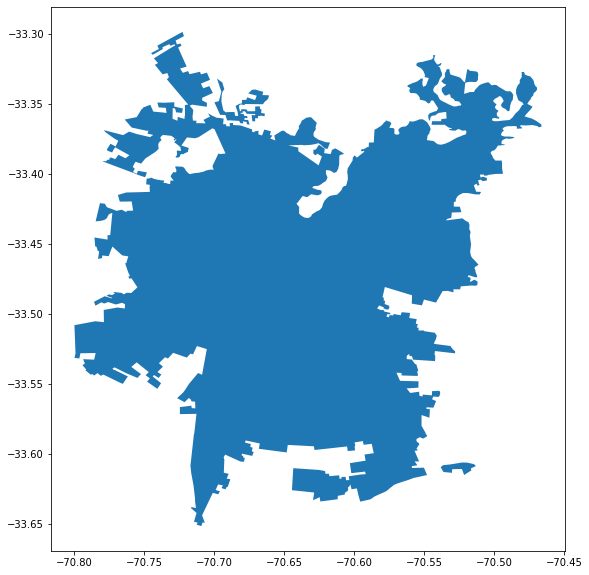

In [10]:
stgo_shape.plot(figsize=(10,10))

In [11]:
stgo_shape.bounds

,minx,miny,maxx,maxy
385,-70.799768,-33.651201,-70.466012,-33.298151


In [12]:
roads_path = r"D:\GIS\Urban_Chile\data\gis_osm_roads_free_1.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')

In [17]:
roads.drop('index_right', axis=1, inplace=True)

In [16]:
stgo_shape.head()

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
385,Santiago,Ciudad,427491.444262,5.821041e+08,(POLYGON ((-70.73662882538488 -33.371762170851...


In [18]:
roads = gpd.sjoin(roads, stgo_shape, op='intersects')

In [20]:
main_roads = roads[(roads.fclass == 'primary') |
                       (roads.fclass == 'motorway')
                      ]

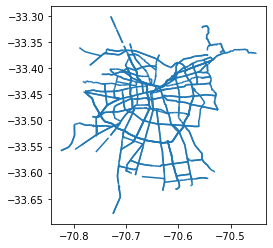

In [21]:
main_roads.plot()